## Assignment A2b: Photon Detection

### John Mays (jkm100)

## 1. Simulating a dim flash of light

In [1]:
# Appropriate Libraries
from A2b_code import *

### 1a. Random times

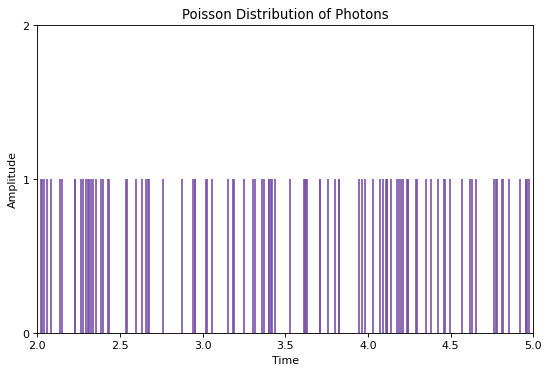

In [2]:
t = randtimes(100, 2, 5)
plotflash(t, 2, 5)

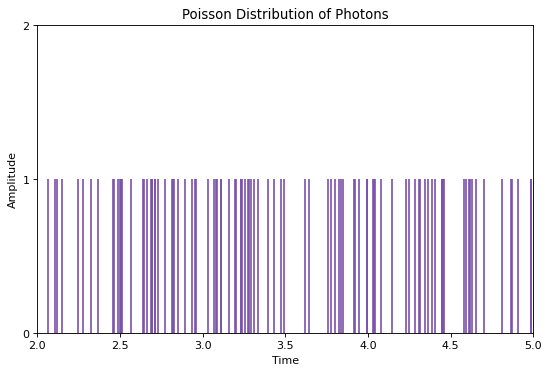

In [3]:
t = randtimes(100, 2, 5)
plotflash(t, 2, 5)

### 1b. Random intervals

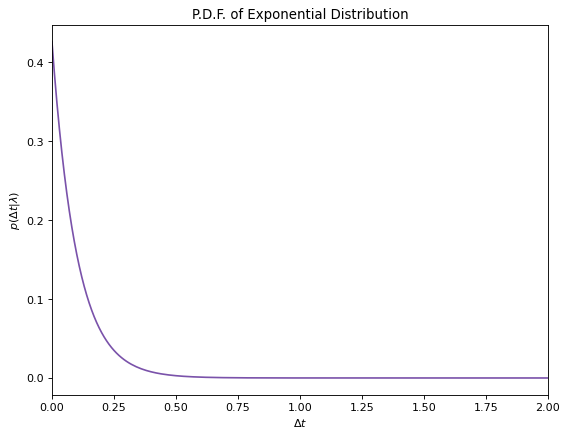

In [4]:
plotpdfexp(lam=10)

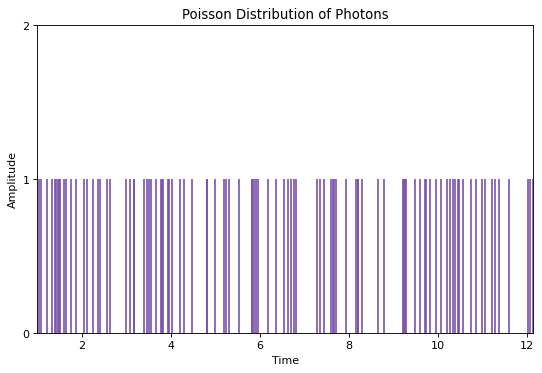

In [5]:
t = randintervals(100, 10, 1)
plotflash(t, 1)

### 1c. Seeing the flash

They have the same output, but different approaches.  The first describes the likelihood of a flash occurring at a given time, independent of the flashes around it, and the second describes the likelihood of a flash occurring w/r/t the amount of time that passed since the flash that came right before it.  

This is inherently probabilistic because the stream of photons entering the eyeball is a random stream with plenty of noise and variation over time, therefore how many are actually going to be detected is a non-deterministic process.

## 2. Calculating the probability detection

### 2a. The probability of K photons

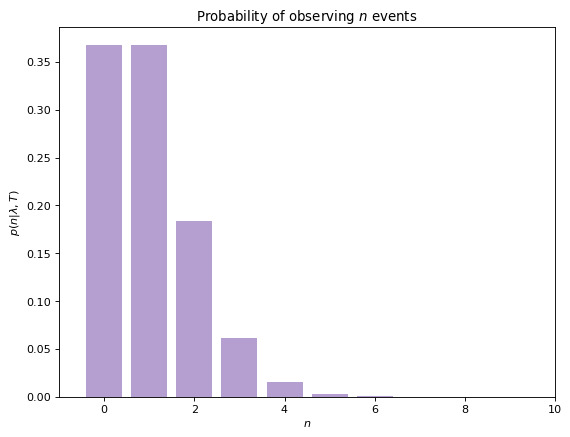

In [6]:
K = np.arange(0, 10)
plotbarpdfphotons(K, lam=10)

At this rate, the subject would most likely not see the flash, as the probabilities of seeing 6, 7, 8, ... photons are close to 0.

##### Doubling the rate:

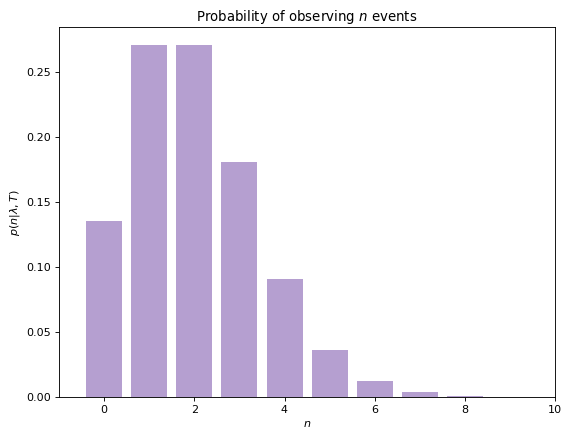

In [7]:
plotbarpdfphotons(K, lam=20)

#### Doubling the rate again:

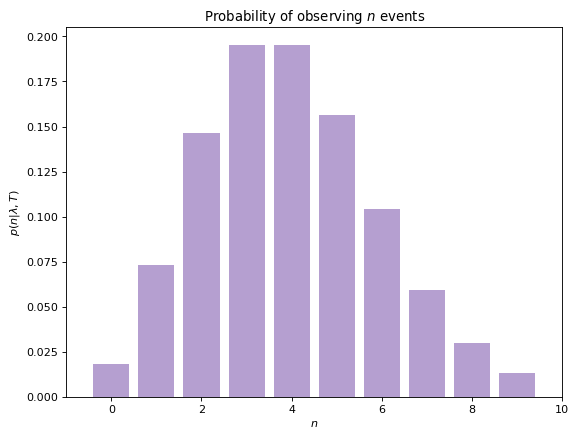

In [8]:
plotbarpdfphotons(K, lam=40)

As the rate goes up, the mean of the distribuition increases, and becomes closer to 6.

### 2b. The probability of K or more photons

In [9]:
detectionprob(6)

0.21486961296959484

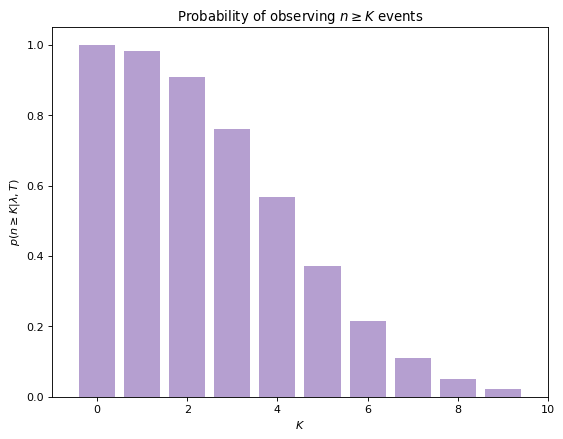

In [10]:
K = np.arange(0, 10)
plotbarcdfphotons(K)

## 3. Estimating the threshold from experimental data

### 3a. Simulating the photon stream

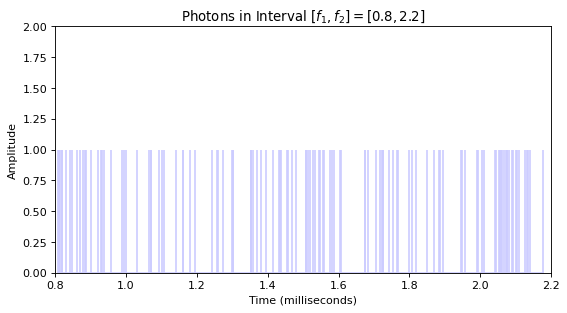

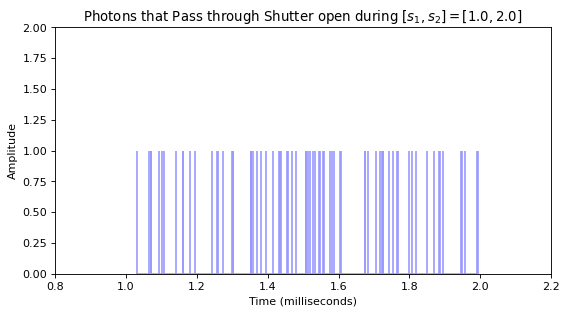

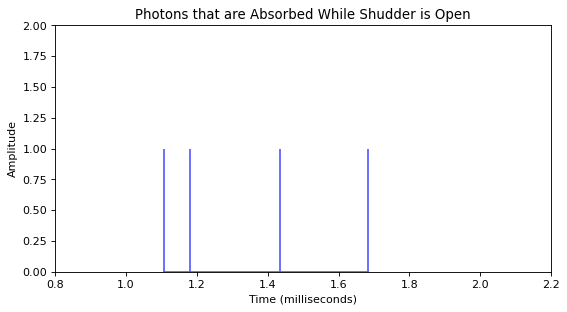

In [11]:
plotHSPsimulation()

### 3b. Probability of seeing

In [12]:
probseeing(I=100)

0.5543203586353891

### 3c. Plotting % detected vs light intensity for different parameters

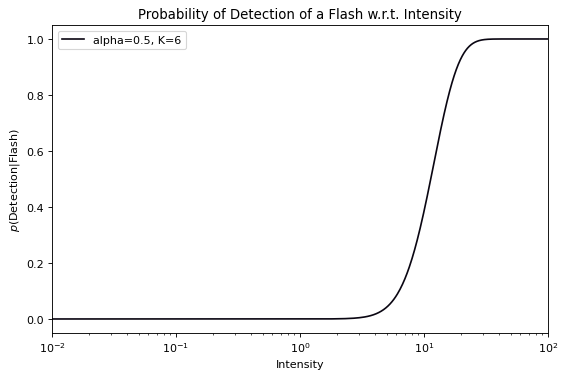

In [13]:
plotdetectioncurve(alpha = 0.5, K=6, seperatecurves=True)

#### Changing only $K$

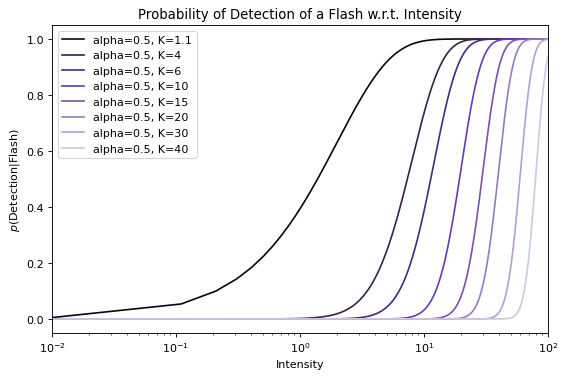

In [14]:
alpha = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
K=[1.1, 4, 6, 10, 15, 20, 30, 40]
plotdetectioncurve(alpha, K, seperatecurves=True)

#### Changing only $\alpha$

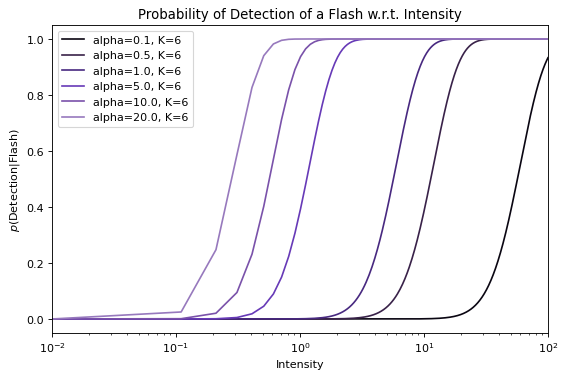

In [15]:
alpha = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
K=[6, 6, 6, 6, 6, 6]
plotdetectioncurve(alpha, K, seperatecurves=True)

It seems as if $\alpha$ increasing shifts the graph to the left and $K$ increasing shifts the graph to the right and makes it steeper.

### 3d. Fitting parameters to experimental data

#### Just the two pairs of data:

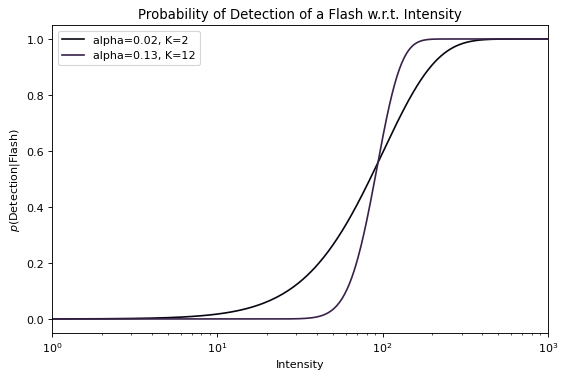

In [16]:
alpha = [0.02, 0.13]
K = [2, 12]
plotdetectioncurve(alpha, K, seperatecurves=True, xlimit=(1,1000))

#### Original two pairs overlaid on the HSP subject SS's pairs:

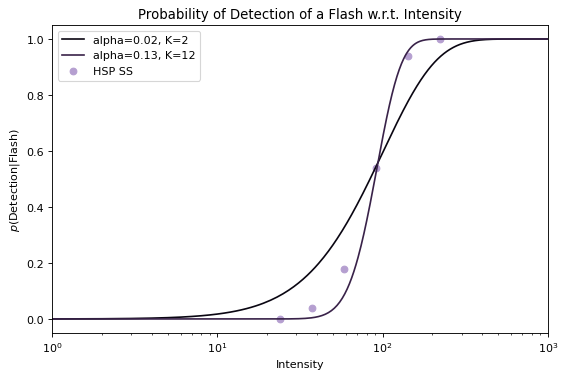

In [17]:
plotdetectioncurve(alpha, K, seperatecurves=True, xlimit=(1,1000), show_ss=True)

#### Approximately Optimal Results: $\alpha = 0.0793$ and $K=7.417$

In [18]:
findfit()

(0.0793, 7.416666666666666)

#### The good fit:

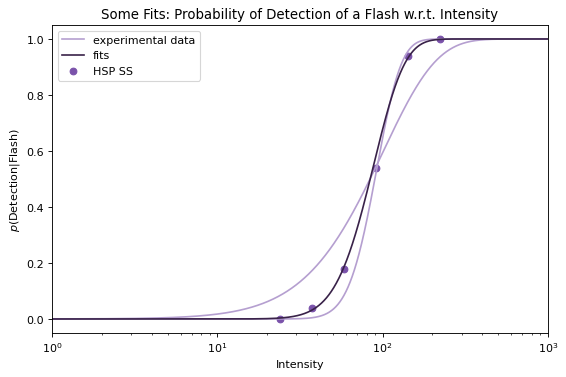

In [19]:
plotfit(alpha=0.0793, K=7.416666666666666, xlimit=(1, 1000), show_fit = True, show_ss=True)

#### Some not-so optimal fits:

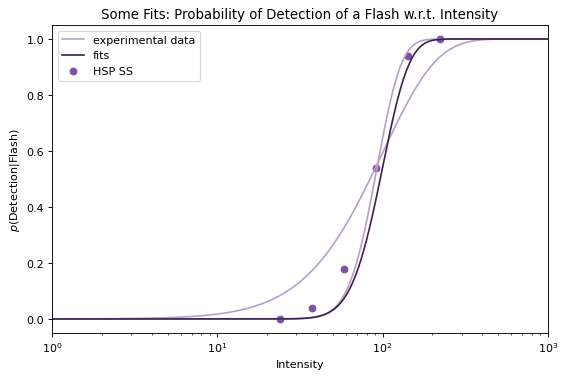

In [20]:
plotfit(alpha=0.10, K=10, xlimit=(1, 1000), show_fit = True, show_ss=True)

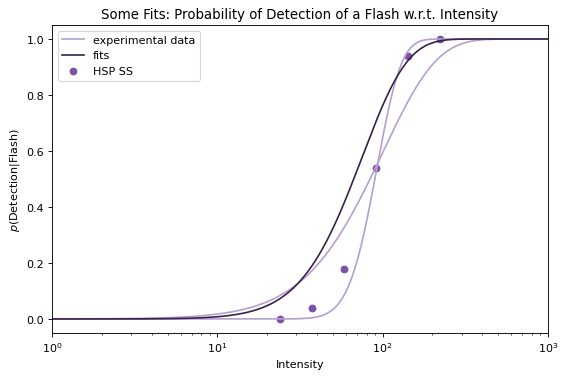

In [21]:
plotfit(alpha=0.04, K=3.5, xlimit=(1, 1000), show_fit = True, show_ss=True)

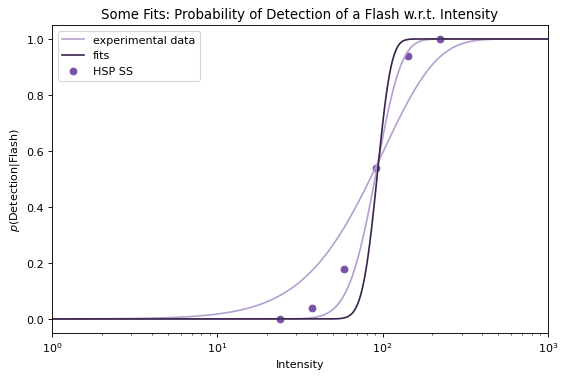

In [22]:
plotfit(alpha=0.43, K=40, xlimit=(1, 1000), show_fit = True, show_ss=True)

I would explain that, in order to see a dim flash of light, assuming there is a tight mean that can describe the $\alpha$ probability of a photon being absorbed by the human retina $\approx 7\%$, it takes around $7$ photons arriving within a given timespan, usually with a maximum of $100$ ms, in order to be detectable.